In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()
figsize = (12, 8)

### data

In [3]:
n_features = 2
n_classes = 2
random_state = 0

X1, Y1 = make_gaussian_quantiles(cov=2,
                                 n_samples=200,
                                 n_features=n_features,
                                 n_classes=n_classes,
                                 random_state=random_state)
X2, Y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples = 300,
                                 n_features=n_features,
                                 n_classes=n_classes,
                                 random_state=random_state)
X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, -Y2 + 1))

### modeling

In [4]:
# create Adaboosted decision tree
max_depth = 1
classifier = DecisionTreeClassifier(max_depth=max_depth)
algorithm = "SAMME"
n_estimators = 200
clf = AdaBoostClassifier(classifier,
                         algorithm=algorithm,
                         n_estimators=n_estimators)

In [5]:
# fitting
clf.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

### plotting training points

In [6]:
plot_colors = 'br'
plot_step = 0.02
class_names = 'AB'

Text(0.5, 1.0, 'decision doundary')

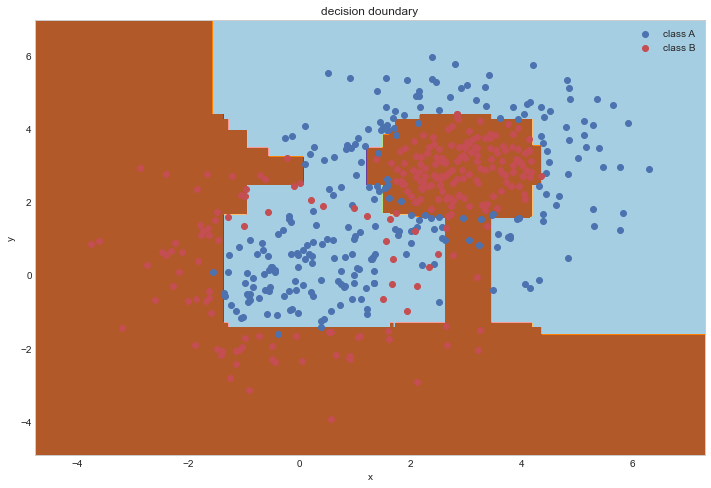

In [7]:
# plot decision boundary
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=figsize)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# plot training points
for i, n, c in zip(range(2), class_names, plot_colors):
    index = np.where(Y == i)
    plt.scatter(X[index, 0], X[index, 1],
                c=c, cmap=plt.cm.Paired,
                label='class %s' %n)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('decision doundary')

In [8]:
training_scores = clf.decision_function(X)
training_scores[0:10]

array([-0.16703287,  0.3713066 , -0.16703287, -0.15100513, -0.05328759,
       -0.17675331, -0.15733673,  0.03498139,  0.32655259, -0.16703287])

### plotting scores

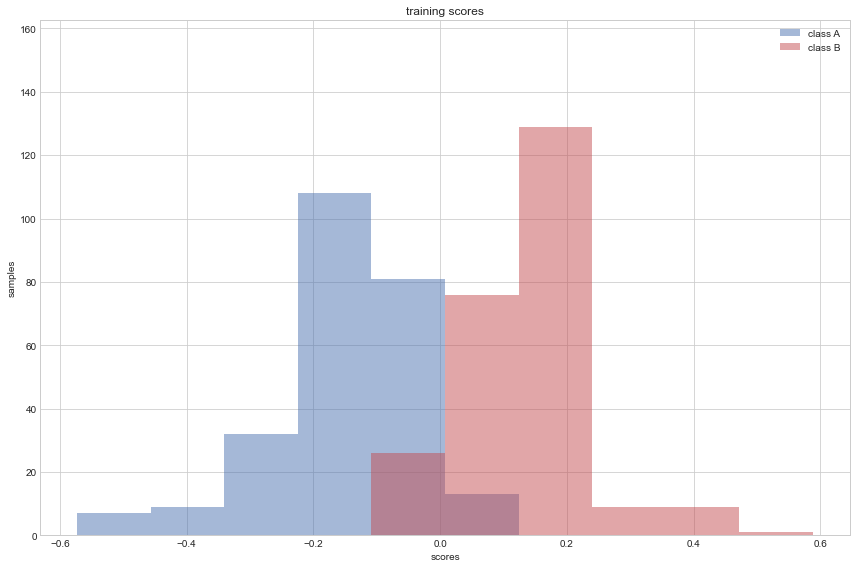

In [9]:
# plot the 2-class decision scores
plt.figure(figsize=figsize)
plot_range = (training_scores.min(), training_scores.max())
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(training_scores[Y==i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label=f"class {n}",
             alpha=0.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2*1.2))
plt.legend(loc="upper right")
plt.xlabel("scores")
plt.ylabel("samples")
plt.title("training scores")
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)

### prediction and verification

In [10]:
predicted = clf.decision_function(X[0, :].reshape(1, -1))
predicted == training_scores[0]

array([ True])